In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Data loading

sf_data = pd.read_csv('ProyectosCTCI.csv', sep = ';')
sf_data.head()

,Código,Agencia,subdireccion,Instrumento,Concurso,Año,Titulo,RegionEjecucion,Tipo,Objetivo,Institucion,SectorEconomico,AreaConocimiento,Monto,TipoBeneficiario
0,VIU21P0017,ANID,Investigación Aplicada e Innovación,VIU - Una Etapa,XI CONCURSO VALORIZACION DE LA INVESTIGACION E...,2021,"CUBACTI, COMPLEJO A BASE DE COBRE, COMO TRATAM...",Región Metropolitana de Santiago,Subsidio,NaN,UNIVERSIDAD DE SANTIAGO DE CHILE,NaN,Ciencias Naturales,30000000.0,Persona Jurídica
1,VIU21P0051,ANID,Investigación Aplicada e Innovación,VIU - Una Etapa,XI CONCURSO VALORIZACION DE LA INVESTIGACION E...,2021,PLATAFORMA TECNOLOGICA PARA LA EVALUACION Y VA...,Región de Antofagasta,Subsidio,NaN,UNIVERSIDAD DE ANTOFAGASTA,NaN,Ciencias Naturales,30000000.0,Persona Jurídica
2,VIU21P0060,ANID,Investigación Aplicada e Innovación,VIU - Una Etapa,XI CONCURSO VALORIZACION DE LA INVESTIGACION E...,2021,BACTOMELANIN: PRODUCTO BASADO EN UN PIGMENTO B...,Región de La Araucanía,Subsidio,NaN,UNIVERSIDAD DE LA FRONTERA,NaN,Ciencias Naturales,30000000.0,Persona Jurídica
3,VIU21P0064,ANID,Investigación Aplicada e Innovación,VIU - Una Etapa,XI CONCURSO VALORIZACION DE LA INVESTIGACION E...,2021,"""VALORIZACION DE MELAZA AZUCARERA MEDIANTE LA ...",Región de La Araucanía,Subsidio,NaN,UNIVERSIDAD DE LA FRONTERA,NaN,Ingeniería y Tecnología,30000000.0,Persona Jurídica
4,VIU21P0018,ANID,Investigación Aplicada e Innovación,VIU - Una Etapa,XI CONCURSO VALORIZACION DE LA INVESTIGACION E...,2021,DESARROLLO DE FORMULACIONES FUNGICIDAS BASADAS...,Región Metropolitana de Santiago,Subsidio,NaN,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,NaN,Ciencias Naturales,30000000.0,Persona Jurídica


In [3]:
# Preliminary Inspection

print(sf_data.dtypes)
print(sf_data.describe(include='all'))

Código               object
Agencia              object
subdireccion         object
Instrumento          object
Concurso             object
Año                   int64
Titulo               object
RegionEjecucion      object
Tipo                 object
Objetivo             object
Institucion          object
SectorEconomico      object
AreaConocimiento     object
Monto               float64
TipoBeneficiario     object
dtype: object
                 Código Agencia                subdireccion       Instrumento  \
count             47818   47818                       47818             47818   
unique            47481       3                           7               398   
top     SIN INFORMACION    ANID  Proyectos de Investigación  FONDECYT REGULAR   
freq                173   38263                       27654             17143   
mean                NaN     NaN                         NaN               NaN   
std                 NaN     NaN                         NaN               NaN   

In [4]:
# Inspect NaN values

sf_data.isnull().sum()

Código                  0
Agencia                 0
subdireccion            0
Instrumento             0
Concurso             8908
Año                     0
Titulo                  3
RegionEjecucion         0
Tipo                    0
Objetivo            38932
Institucion           249
SectorEconomico     38910
AreaConocimiento     8908
Monto                1540
TipoBeneficiario     8908
dtype: int64

In [5]:
# Get value counts for columns of interest - State agencies and sub-agencies

    # Agencia (Agency)

print(sf_data.Agencia.value_counts())

    # Subdirección (Sub-agencies)

print(sf_data.subdireccion.value_counts())

ANID                  38263
Corfo                  8908
Subsecretaría CTCI      647
Name: Agencia, dtype: int64
Proyectos de Investigación             27654
Innovación                              8908
REC                                     5049
Investigación Aplicada e Innovación     4058
Centros e Investigación Asociativa      1003
Ciencia y Sociedad                       647
No Aplica                                499
Name: subdireccion, dtype: int64


In [6]:
# Get value counts for columns of interest - Funding Instruments

    # Instrumento (Instrument)

print(sf_data.Instrumento.value_counts())

    # Concurso (Contests)

print(sf_data.Concurso.value_counts())

    # Año de Ejecución (Year of Execution)

print(sf_data.Año.value_counts())

    # Tipo de fondo (Type of Funding)
    
print(sf_data.Tipo.value_counts())

FONDECYT REGULAR                                                              17143
FONDECYT INICIACION                                                            4337
FONDECYT POSTDOCTORADO                                                         3858
INCENTIVO A LA COOPERACION INTERNACIONAL FONDECYT                              1570
Ley I+D                                                                        1025
                                                                              ...  
SISTEMA DE INFORMACION CIENTIFICA, TECNOLOGICA Y DE INNOVACION TECNOLOGICA        1
Programa de Proyectos de T.T.  - 1a fase - 2001                                   1
Línea del Apoyo al Extensionismo                                                  1
Redes De Inversionistas Ángeles                                                   1
INVESTIGACION CONJUNTA - RECURSOS MINEROS CONICYT-ACADEMIA DE FINLANDIA           1
Name: Instrumento, Length: 398, dtype: int64
REGULAR                        

In [7]:
# Get value counts for columns of interest - Awardees

    # Sector Económico (Economic Sector)

print(sf_data.SectorEconomico.value_counts())

    # Area de Conocimiento (Area of Knowledge)

print(sf_data.AreaConocimiento.value_counts())

    # Tipo de Beneficiario (Type of Awardee)
    
print(sf_data.TipoBeneficiario.value_counts())

    # Región (Region)

print(sf_data.RegionEjecucion.value_counts())

Multisectorial                                                                                 922
Agrícola (excepto cultivo de uvas)                                                             899
Minería y metalurgia extractiva                                                                807
Alimentos (excepto producción de vino y derivados)                                             775
Pesca y acuicultura                                                                            636
Salud y Farmacéutica (en humanos)                                                              629
Comercio y retail                                                                              523
Educación y servicios conexos                                                                  471
Construcción                                                                                   427
Turismo                                                                                        397
Energético

In [8]:
# Replace all occurences of "Región de Magallanes y de La Antártica Chilena" for "Región de Magallanes y de la Antártica Chilena". Same method to fix "Region de los Lagos"

sf_data['RegionEjecucion'] = sf_data['RegionEjecucion'].replace('Región de Magallanes y de La Antártica Chilena', 'Región de Magallanes y de la Antártica Chilena')
sf_data['RegionEjecucion'] = sf_data['RegionEjecucion'].replace('Región de los Lagos', 'Región de Los Lagos')

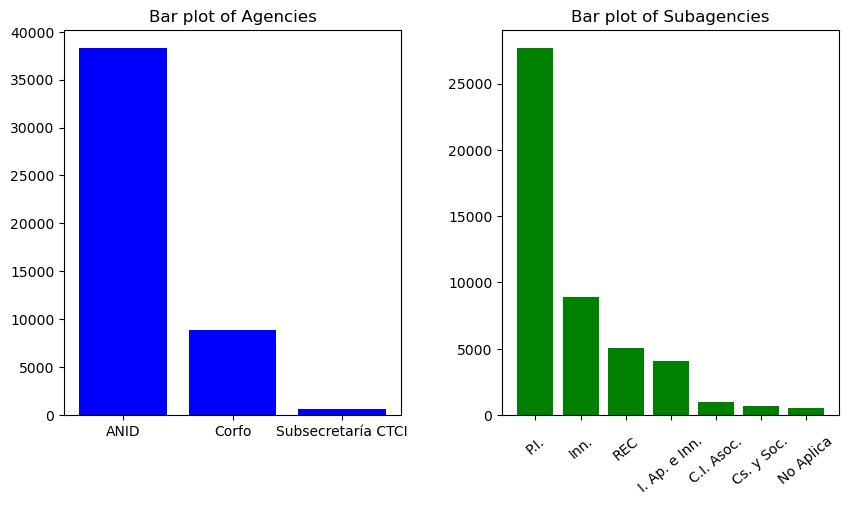

In [9]:
# Descriptive Analysis, Barplot - State agencies and sub-agencies


# Compute the counts of each agency and subagency
agency_counts = sf_data['Agencia'].value_counts()
subagency_counts = sf_data['subdireccion'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create the State Agencies bar plot in the left subplot
axs[0].bar(agency_counts.index, agency_counts.values, color='blue')
axs[0].set_title('Bar plot of Agencies')

# Create a bar plot of the subagencies in the right subplot
axs[1].bar(subagency_counts.index, subagency_counts.values, color='green')
axs[1].set_title('Bar plot of Subagencies')

# Rotate the xtick labels by 30 degrees and set labels
xticks = axs[1].get_xticks()
xticklabels = axs[1].get_xticklabels()
axs[1].set_xticks(xticks)
labels = ['P.I.', 'Inn.', 'REC',  'I. Ap. e Inn.',  'C.I. Asoc.', 'Cs. y Soc.', 'No Aplica']
axs[1].set_xticklabels(labels=labels, rotation=40)


# Adjust the spacing between the tick labels
axs[1].tick_params(axis='x', which='major', pad=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Save the figure as a PNG file
#fig.savefig('myfigure.png')

# Display the plot
plt.show()

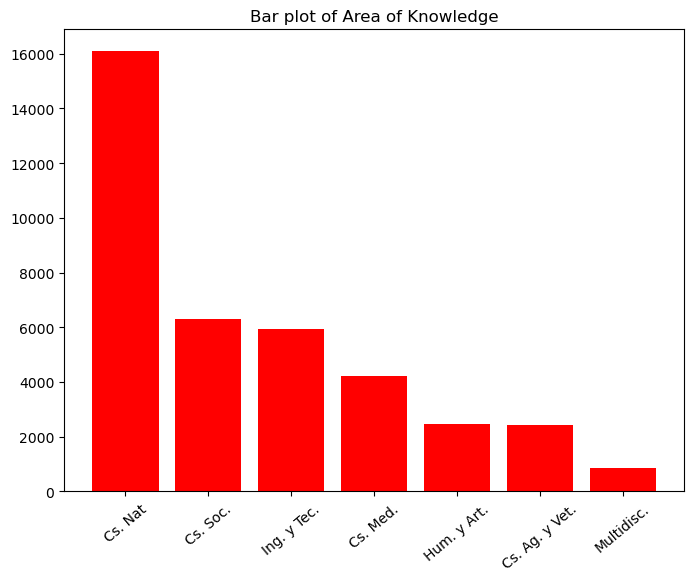

In [10]:
# Descriptive Analysis, Barplot - Area of Knowledge

aok_counts = sf_data[(sf_data['AreaConocimiento'] != 'Sin información') & (sf_data['AreaConocimiento'] != 'No Aplica')].AreaConocimiento.value_counts()

plt.figure(figsize=(8,6))
ax_1 = plt.bar(aok_counts.index, aok_counts.values, color='red')
plt.title('Bar plot of Area of Knowledge')
aok_ticks = [0, 1, 2, 3, 4, 5, 6]
aok_labels = ['Cs. Nat', 'Cs. Soc.', 'Ing. y Tec.', 'Cs. Med.', 'Hum. y Art.', 'Cs. Ag. y Vet.', 'Multidisc.']
plt.xticks(ticks = aok_ticks, labels = aok_labels, rotation=40)
plt.show()

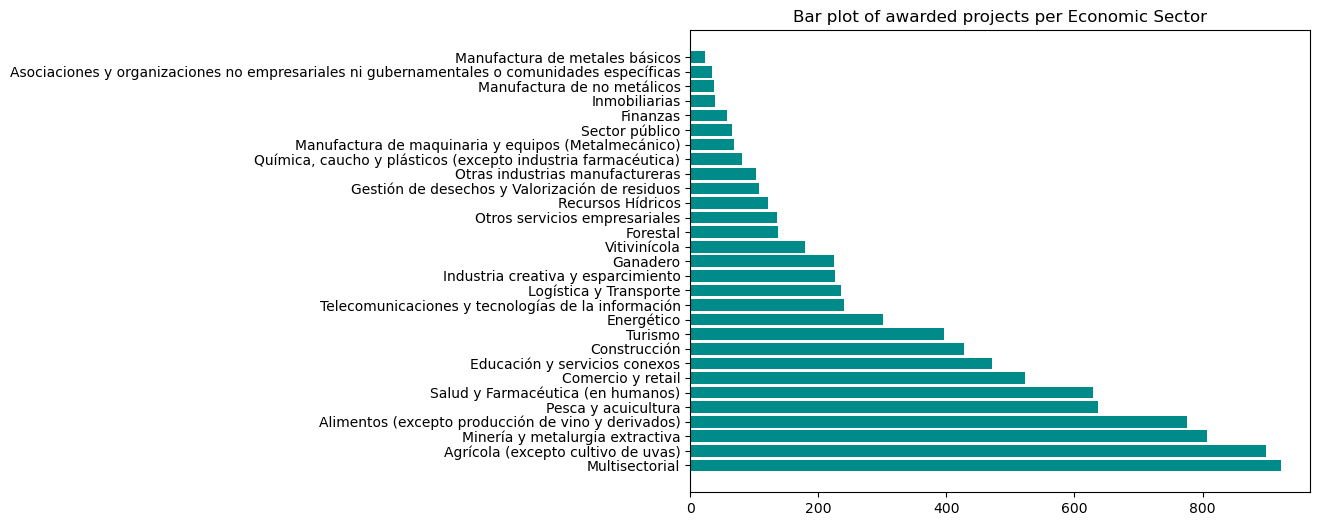

In [11]:
# Descriptive Analysis, Barplot - Economic Sector

es_counts = sf_data[sf_data['SectorEconomico'] != 'sin información']['SectorEconomico'].value_counts()

plt.figure(figsize=(8,6))
ax_5 = plt.barh(es_counts.index, es_counts.values, color = 'darkcyan')
plt.title("Bar plot of awarded projects per Economic Sector")
plt.show()

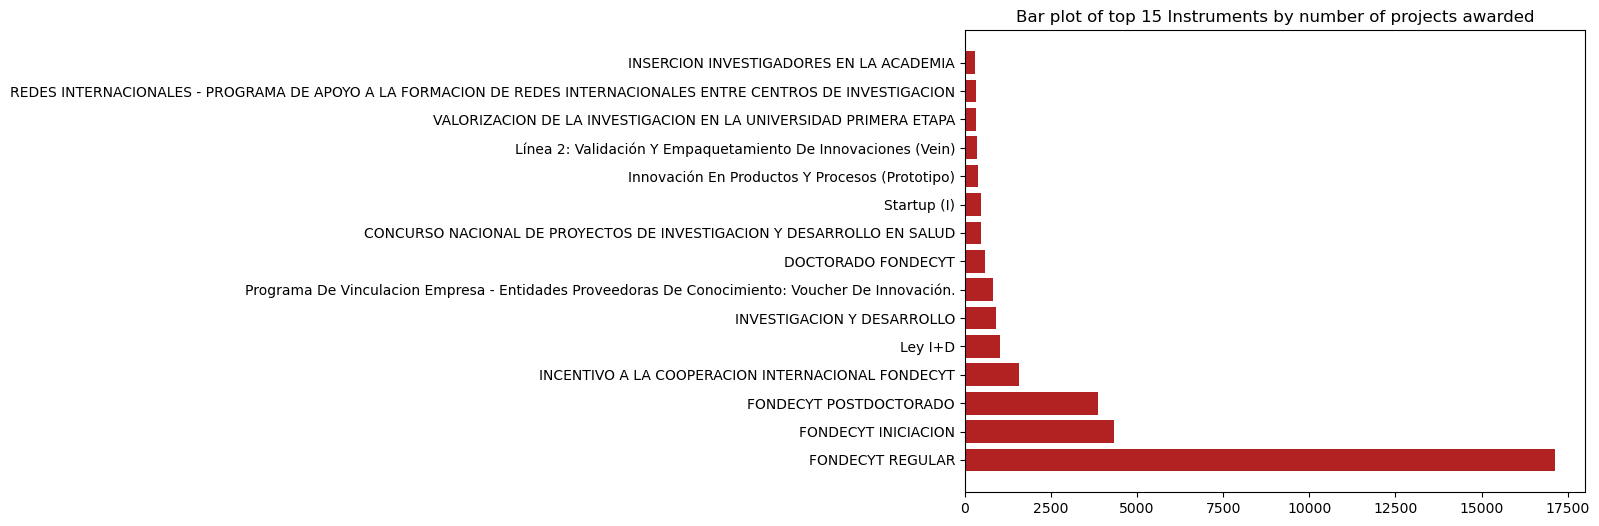

In [12]:
# Descriptive Analysis, Barplot - Instrument

i_counts = sf_data.Instrumento.value_counts()
top_counts = i_counts.head(15)
plt.figure(figsize=(8,6))
ax_6 = plt.barh(top_counts.index, top_counts.values, color = 'firebrick')
plt.title("Bar plot of top 15 Instruments by number of projects awarded")
plt.show()

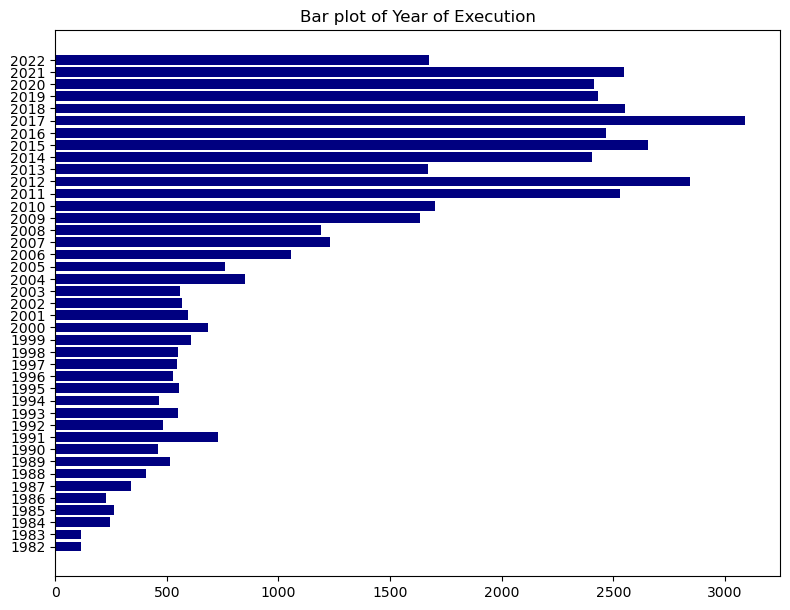

In [13]:
# Descriptive Analysis, Bar Plot - Year of Execution
year_counts = sf_data['Año'].value_counts()
plt.figure(figsize=(8,6))
ax_2 = plt.barh(year_counts.index, year_counts.values, color='navy')
plt.yticks(range(1982, 2023))
plt.tight_layout()
plt.title('Bar plot of Year of Execution')
plt.show()

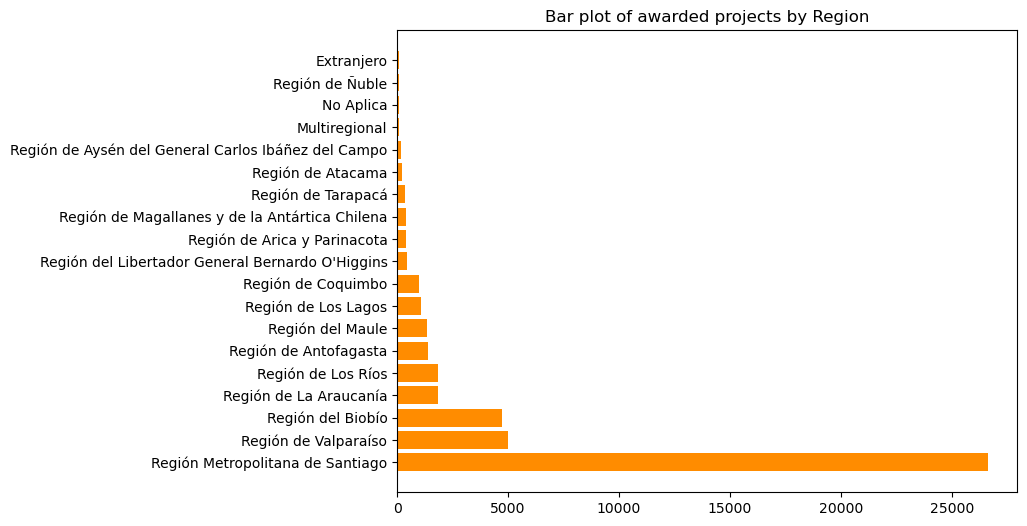

In [14]:
# Descriptive Analysis, Bar chart - Region of Execution

curated_region_data = sf_data[(sf_data['RegionEjecucion'] != 'Sin Información') & ((sf_data['RegionEjecucion'] != 'Sin definir'))]['RegionEjecucion'].value_counts()

plt.figure(figsize=(8,6))
ax_4 = plt.barh(curated_region_data.index, curated_region_data.values, color = 'darkorange')
plt.title("Bar plot of awarded projects by Region")
plt.show()

In [31]:
# Grouped table - State agencies and sub-agencies: Average amount granted by Agency and Sub-agency

aag_a = sf_data.groupby(['Agencia']).Monto.mean()
print(aag_a)

max_idx = aag_a.idxmax()
max_a = max_idx
max_aa_a = round(aag_a.loc[max_idx], 2)

min_idx = aag_a.idxmin()
min_a = min_idx
min_aa_a = round(aag_a.loc[min_idx], 2)

print(max_a)
print(max_aa_a)
print(min_a)
print(min_aa_a)

Agencia
ANID                  8.980344e+07
Corfo                 5.853113e+07
Subsecretaría CTCI    4.584447e+07
Name: Monto, dtype: float64
ANID
89803439.02
Subsecretaría CTCI
45844467.65


In [32]:
# Grouped table - State agencies and sub-agencies: Average amount granted by Sub-agency

aag_sa = sf_data[sf_data['subdireccion'] != 'No Aplica'].groupby(['subdireccion']).Monto.mean()
print(aag_sa)

max_idx_2 = aag_sa.idxmax()
max_sa = max_idx_2
max_aa_sa = round(aag_sa.loc[max_idx_2], 2)

min_idx_2 = aag_sa.idxmin()
min_sa = min_idx_2
min_aa_sa = round(aag_sa.loc[min_idx_2], 2)

print(max_sa)
print(max_aa_sa)
print(min_sa)
print(min_aa_sa)


subdireccion
Centros e Investigación Asociativa     8.597148e+08
Ciencia y Sociedad                     4.584447e+07
Innovación                             5.853113e+07
Investigación Aplicada e Innovación    1.145396e+08
Proyectos de Investigación             6.729778e+07
REC                                    4.022675e+07
Name: Monto, dtype: float64
Centros e Investigación Asociativa
859714766.75
REC
40226751.19


In [35]:
# Grouped table - Funding instruments: Average amount granted by Instrument

aag_i = sf_data[sf_data['Monto'] != 0].groupby(['Instrumento']).Monto.mean()
print(aag_i)

max_idx_3 = aag_i.idxmax()
max_i = max_idx_3
max_aa_i = round(aag_i.loc[max_idx_3], 2)

min_idx_3 = aag_i.idxmin()
min_i = min_idx_3
min_aa_i = round(aag_i.loc[min_idx_3], 2)

print(max_i)
print(max_aa_i)
print(min_i)
print(min_aa_i)

Instrumento
2014/Gestion De La Innovacion                                        2.997992e+07
ACCION REGIONAL                                                      9.948286e+07
ALIMENTOS FUNCIONALES                                                1.661598e+08
AMSUD                                                                1.302437e+08
ANILLOS CYT                                                          4.500000e+08
                                                                         ...     
VIU - Etapa 1                                                        2.000000e+06
VIU - Etapa 2                                                        2.400000e+07
VIU - Etapa 2 Bases 4091/2018 Octava Convocatoria RenovaciOn 2019    2.400000e+07
VIU - Una Etapa                                                      2.991396e+07
Voucher De Innovación Para Empresas De Mujeres                       6.640054e+06
Name: Monto, Length: 398, dtype: float64
CENTROS CIENTIFICOS Y TECNOLOGICOS DE EXCELEN

In [36]:
# Grouped table - Funding instruments: Average amount granted by Type of Contest
aag_tc = sf_data.groupby(['Tipo']).Monto.mean()
print(aag_tc)

max_idx_4 = aag_tc.idxmax()
max_tc = max_idx_4
max_aa_tc = round(aag_tc.loc[max_idx_4], 2)

min_idx_4 = aag_tc.idxmin()
min_tc = min_idx_4
min_aa_tc = round(aag_tc.loc[min_idx_4], 2)

print(max_tc)
print(max_aa_tc)
print(min_tc)
print(min_aa_tc)

Tipo
Ley         2.973494e+06
Subsidio    8.499977e+07
Name: Monto, dtype: float64
Subsidio
84999768.95
Ley
2973493.76


In [37]:
# Grouped table - Funding instruments: Average amount granted by Year of Execution

aag_y = sf_data.groupby('Año').Monto.mean()

print(aag_y)

max_idx_5 = aag_y.idxmax()
max_y = max_idx_5
max_aa_y = round(aag_y.loc[max_idx_5], 2)

min_idx_5 = aag_y.idxmin()
min_y = min_idx_5
min_aa_y = round(aag_y.loc[min_idx_5], 2)

print(max_y)
print(max_aa_y)
print(min_y)
print(min_aa_y)


Año
1982    3.925826e+05
1983    3.601197e+05
1984    3.719306e+05
1985    4.850038e+05
1986    1.922329e+06
1987    1.895788e+06
1988    7.142437e+06
1989    7.374891e+06
1990    8.643455e+06
1991    3.502765e+07
1992    3.402567e+07
1993    3.089621e+07
1994    2.214799e+07
1995    2.364391e+07
1996    3.228727e+07
1997    5.882444e+07
1998    8.758463e+07
1999    7.724010e+07
2000    4.571698e+07
2001    1.036240e+08
2002    7.088161e+07
2003    6.932902e+07
2004    6.576380e+07
2005    7.036357e+07
2006    5.679170e+07
2007    1.462253e+08
2008    6.200614e+07
2009    1.232265e+08
2010    9.263879e+07
2011    7.475031e+07
2012    9.826054e+07
2013    8.994597e+07
2014    9.517077e+07
2015    8.825891e+07
2016    8.578053e+07
2017    7.682009e+07
2018    9.592420e+07
2019    1.023544e+08
2020    9.323178e+07
2021    1.414834e+08
2022    1.065992e+08
Name: Monto, dtype: float64
2007
146225337.69
1983
360119.66


In [38]:
# Grouped table - Awardees: Average amount granted by Economic Area

aag_ea = sf_data[sf_data['SectorEconomico'] != 'sin información'].groupby(['SectorEconomico']).Monto.mean()

print(aag_ea)

max_idx_6 = aag_ea.idxmax()
max_ea = max_idx_6
max_aa_ea = round(aag_ea.loc[max_idx_6], 2)

min_idx_6 = aag_ea.idxmin()
min_ea = min_idx_6
min_aa_ea = round(aag_ea.loc[min_idx_6], 2)

print(max_ea)
print(max_aa_ea)
print(min_ea)
print(min_aa_ea)

SectorEconomico
Agrícola (excepto cultivo de uvas)                                                             5.706615e+07
Alimentos (excepto producción de vino y derivados)                                             3.718694e+07
Asociaciones y organizaciones no empresariales ni gubernamentales o comunidades específicas    3.690815e+07
Comercio y retail                                                                              3.200607e+07
Construcción                                                                                   5.481725e+07
Educación y servicios conexos                                                                  4.431951e+07
Energético                                                                                     6.208279e+07
Finanzas                                                                                       4.941506e+07
Forestal                                                                                       4.670959e+07
Ganadero    

In [39]:
# Grouped table - Awardees: Average amount granted by Area of Knowledge

aag_ak = sf_data[(sf_data['AreaConocimiento'] != 'Sin información') & (sf_data['AreaConocimiento'] != 'No Aplica')].groupby(['AreaConocimiento']).Monto.mean()
print(aag_ak)

max_idx_7 = aag_ak.idxmax()
max_ak = max_idx_7
max_aa_ak = round(aag_ak.loc[max_idx_7], 2)

min_idx_7 = aag_ak.idxmin()
min_ak = min_idx_7
min_aa_ak = round(aag_ak.loc[min_idx_7], 2)

print(max_ak)
print(max_aa_ak)
print(min_ak)
print(min_aa_ak)

AreaConocimiento
Ciencias Agrícolas y Veterinarias    9.903207e+07
Ciencias Médicas y de la Salud       8.869418e+07
Ciencias Naturales                   9.540431e+07
Ciencias Sociales                    6.451022e+07
Humanidades y Artes                  4.469886e+07
Ingeniería y Tecnología              9.711795e+07
Multidisciplinario                   2.182715e+08
Name: Monto, dtype: float64
Multidisciplinario
218271493.5
Humanidades y Artes
44698859.58


In [40]:
# Grouped table - Awardees: Average amount granted by Type of Beneficiary

aag_tb = sf_data[sf_data['TipoBeneficiario'] != 'Sin información'].groupby(['TipoBeneficiario']).Monto.mean()
print(aag_tb)

max_idx_8 = aag_tb.idxmax()
max_tb = max_idx_8
max_aa_tb = round(aag_tb.loc[max_idx_8], 2)

min_idx_8 = aag_tb.idxmin()
min_tb = min_idx_8
min_aa_tb = round(aag_tb.loc[min_idx_8], 2)

print(max_tb)
print(max_aa_tb)
print(min_tb)
print(min_aa_tb)

TipoBeneficiario
Otra                                                         2.159080e+07
Persona Jurídica                                             1.655018e+08
Persona Jurídica - Empresa                                   3.715557e+07
Persona Jurídica - Institución Privada Sin Fines de Lucro    3.076437e+07
Persona Jurídica - Institución de Educación Superior         9.393932e+07
Persona Jurídica - Servicios Públicos                        2.995000e+07
Persona Natural                                              6.835075e+07
Name: Monto, dtype: float64
Persona Jurídica
165501783.93
Otra
21590797.24


In [23]:
# Grouped table - Awardees: Average amount granted by region

aag_r = sf_data[(sf_data['RegionEjecucion'] != 'Sin Información') & ((sf_data['RegionEjecucion'] != 'Sin definir'))].groupby(['RegionEjecucion']).Monto.mean()
print(aag_r)

max_idx_9 = aag_r.idxmax()
max_r = max_idx_9
max_aa_r = round(aag_r.loc[max_idx_9], 2)

min_idx_9 = aag_r.idxmin()
min_r = min_idx_9
min_aa_r = round(aag_tb.loc[min_idx_8], 2)

print(max_r)
print(max_aa_r)


RegionEjecucion
Extranjero                                             6.909239e+06
Multiregional                                          2.027068e+08
No Aplica                                              4.428252e+07
Región Metropolitana de Santiago                       8.642542e+07
Región de Antofagasta                                  7.775534e+07
Región de Arica y Parinacota                           6.989474e+07
Región de Atacama                                      8.245006e+07
Región de Aysén del General Carlos Ibáñez del Campo    1.022045e+08
Región de Coquimbo                                     7.862042e+07
Región de La Araucanía                                 7.287728e+07
Región de Los Lagos                                    7.427428e+07
Región de Los Ríos                                     9.639722e+07
Región de Magallanes y de la Antártica Chilena         1.045515e+08
Región de Tarapacá                                     8.876220e+07
Región de Valparaíso            

In [24]:
# Highest average amount granted per category - Summarizing table.

#aa_dict = {'Parameter': {'': [max_agencia, max_avg_amount], ''}}

In [25]:
# Define function to get max and min values.

def max_min_func(list_of_series):
    list_of_texts = []
    for i in list_of_series:
        name_of_series = i.index.name
        series_max = round(i.max(), 2)
        series_min = round(i.min(),2)
        list_of_texts.append(f'The {name_of_series} column has a maximum value of CLP{series_max} and a minimum value of CLP{series_min}.\n')
    for x in list_of_texts:
        print(x)

In [26]:
# Get max and min values of the different grouped tables (Year, Economic Sector, Area of Knowledge, Type of Beneficiary, Region)

grouped_tables = [aag_a, aag_sa, aag_i, aag_tc, aag_y, aag_ea, aag_ak, aag_tb, aag_r]
max_min_func(grouped_tables)

The Agencia column has a maximum value of CLP89803439.02 and a minimum value of CLP45844467.65.

The subdireccion column has a maximum value of CLP859714766.75 and a minimum value of CLP40226751.19.

The Instrumento column has a maximum value of CLP10908859194.35 and a minimum value of CLP0.0.

The Tipo column has a maximum value of CLP84999768.95 and a minimum value of CLP2973493.76.

The Año column has a maximum value of CLP146225337.69 and a minimum value of CLP360119.66.

The SectorEconomico column has a maximum value of CLP92864661.13 and a minimum value of CLP26882051.74.

The AreaConocimiento column has a maximum value of CLP218271493.5 and a minimum value of CLP44698859.58.

The TipoBeneficiario column has a maximum value of CLP165501783.93 and a minimum value of CLP21590797.24.

The RegionEjecucion column has a maximum value of CLP202706838.09 and a minimum value of CLP6909239.11.



In [27]:
# Covariance of Year and Amount granted.

# Drop NaN values

curated_data = sf_data[(sf_data['Monto'].notnull())]

y_ag_cov = np.cov(curated_data['Año'], curated_data['Monto'])
print(y_ag_cov)

# A positive covariance (2.43e+08) suggest that these variables are in direct relationship.
# As age increases, the amount granted grows.

[[9.27692689e+01 2.43238902e+08]
 [2.43238902e+08 1.13049593e+17]]


In [28]:
# Correlation of Year and Amount granted.

y_ag_corr, p = stats.pearsonr(curated_data['Año'], curated_data['Monto'])
print(y_ag_corr, p)

# Even though the correlation es positive, it's relatively near 0.
# This suggests that while the relation is positive, it's weak. 
# The p-value is very small, which suggests that this result is not due to chance: its statistically significative.

0.07510977602379174 6.947962495698141e-59
